In [214]:
import pandas as pd
from matplotlib import pyplot as plt
import os
from pathlib import Path
import seaborn as sns

In [215]:
data_path = os.path.join(str(Path.home()), 'PycharmProjects/ML/src/data/sentiment_twitter')
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/aleksandrkoval/PycharmProjects/ML/src/data/sentiment_twitter/test.csv
/Users/aleksandrkoval/PycharmProjects/ML/src/data/sentiment_twitter/train.csv
/Users/aleksandrkoval/PycharmProjects/ML/src/data/sentiment_twitter/labeled_data.csv


In [216]:
path = os.path.join(str(Path.home()), 'PycharmProjects/ML/src/data/sentiment_twitter')
test_path = os.path.join(path, os.listdir(path)[0])
train_path = os.path.join(path, os.listdir(path)[1])
label_path = os.path.join(path, os.listdir(path)[2])
os.listdir(path)

['test.csv', 'train.csv', 'labeled_data.csv']

In [217]:
df_train = pd.read_csv(train_path)
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [218]:
print("shape: \n", df_train.shape, "\n")
print("describe \n", df_train.describe(), "\n")
print("info \n", df_train.info(), "\n")

shape: 
 (31962, 3) 

describe 
                  id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
info 
 None 



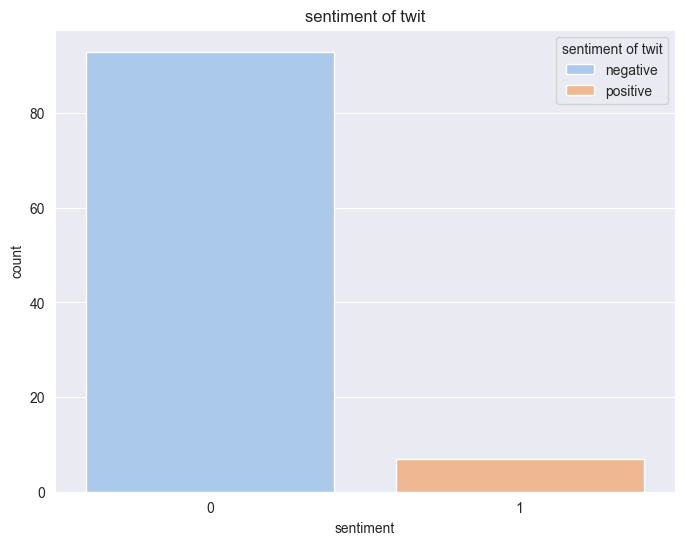

In [219]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='label', palette='pastel', stat='percent', hue='label')
plt.title('sentiment of twit')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.legend(title='sentiment of twit', labels=['negative', 'positive'])
plt.show()

Негативных данных немного. Посмотрим, что мы сможем увидеть на этом наборе

In [220]:
df_train.drop('id',axis=1,inplace=True)

In [221]:
df_train.shape

(31962, 2)

Подготовка данных для обработки

In [222]:
import re
result = re.sub(r'India', 'the World', 'AV is largest Analytics community of India')
print(result)

AV is largest Analytics community of the World


In [223]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))

In [224]:
# выполним очистку текста от синтаксического и пунктуационного мусора
def clean_text(string): 
    string = str(string).lower() # Понизить регистры. Мы будем вызывать CountVectorizer, который по-умолчанию это выполняет, но лишний раз может оказаться не лишним.
    string = re.sub(r"[^a-zA-Z]", " ", string) # Оставляем только латинские буквы. Это сильное условие для английского текста, но не универсальное. Поэтому по развлекаемся точечно.
    string = re.sub(r'\[.*?\]', '', string) # разберёмся с квадратными скобками
    string = re.sub(r'https?://\S+|www\.\S+', '', string) # убрать адресные строки
    string = re.sub(r'<.*?>+', '', string) # убираем случайные HTML-теги
    string = re.sub(r'[^\w\s]', '', string) #убрать всю пунктуацию
    string = re.sub(r'\n', '', string) # удалим все переносы строки
    string = re.sub(r'\w*\d\w*', '', string) # убираем слова с цифрой в середине
    string = [word for word in string.split(' ') if word not in stopword] # очищаем текст от слов исключений
    string= " ".join(string)
    string = [stemmer.stem(word) for word in string.split(' ')] # приводим слова к исходному значению, убирая склонения
    string= " ".join(string)
    string = re.sub('  ', '', string) # уберём все двойные пробелы
    #print(string)
    return string

In [225]:
df_train['tweet']=df_train['tweet'].apply(clean_text)
df_train

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct run
1,0,useruser thanklyft credit use caus offer wheelchair van pdxdisapointgetthank
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguidsocieti motiv
...,...,...
31957,0,ateuser isz youuu
31958,0,see nina turner airwav tri wrap mantl genuin hero like shirley chisolm shameimwithh
31959,0,listen sad song monday morn otw work sad
31960,1,usersikhtempl vandaliscalgari wso condemnact


In [226]:
df_train.shape

(31962, 2)

In [227]:
df_train.head()

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct run
1,0,useruser thanklyft credit use caus offer wheelchair van pdxdisapointgetthank
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguidsocieti motiv


In [228]:
#проконтролируем тип наших данных
x=df_train['tweet']
y=df_train['label']
type(x)

pandas.core.series.Series

Разделим нашу выборку на обучающую и тестовую

In [229]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

Запустим класс CountVectorizer. Этот класс позволит выполнить преобразование нашего текста в тензор частоты слов нашего списка твитов для каждого твита.

Этот класс позволяет также задавать n-граммы, смысловые последовательности слов, чтобы удержать контекст вхождения. Используем вхождение до 4 слов

In [230]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(ngram_range=(1,4))
x_train_vectorizer=count.fit_transform(x_train)

In [231]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Мы получили сильно разреженную матрицу с большим количеством нулей, но это ожидаемо

Выполним преобразование нашего тензора с помощью метода взвешивания важности слова в твите TF-IDF

In [232]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [233]:
x_train_tfidf = tfidf_transformer.fit_transform(x_train_vectorizer)
x_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [234]:
x_test_tfidf = tfidf_transformer.transform(x_test_vectorizer)
x_test_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [235]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Теперь наши данные готовы для обучения модели наивного Байесовского классификатора с мультиномиальным распределением. 

In [236]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)

Произведём предсказание на нашей модели Vectorizer

In [237]:
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)

Поинтересуемся качеством нашего предсказания. Для этого выведем матрицу ошибок для целевых y_test, и предсказанных, prediction_vectorizer, значений

In [238]:
print(confusion_matrix(y_test,prediction_vectorizer))

[[5963    2]
 [ 289  139]]


Этот результат нам показывает:
* TN = 5920 - модель правильно предсказала негативность твита
* FN = 290 - модель неправильно предсказала негативность твита
* TP = 183 - модель правильно предсказала позитивность твита
* FP = 0 - модель неправильно предсказала позитивность твита

Посмотрим подробный отчёт по классификации

In [239]:
print (classification_report(y_test, prediction_vectorizer))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5965
           1       0.99      0.32      0.49       428

    accuracy                           0.95      6393
   macro avg       0.97      0.66      0.73      6393
weighted avg       0.96      0.95      0.94      6393



Мы получили очень хорошие результаты предсказания.
 
Точность соотнесения объекта класса к классам предсказанным, как этот класс - точность положительных прогнозов 95% и 100%

<h1 align="center"> $ precision = \frac{ TP }{ TP + FP } $ </h1>

Доля правильно идентифицированных положительных прогнозов, однако, показала результаты скромнее 100% и 39% 

<h1 align="center"> $ recall = \frac{ TP }{ TP + FN } $ </h1>

f1-score среднее гармоническое между precision и recall:

<h1 align="center"> $ f1score = 2*\frac{ recall * rpecision }{ recall + precision } $ </h1>

Интерпретация значений для f1 имеет смысл:
* f1-score > 0,9 = отлично.
* f1-score между 0,8 и 0,9 = хорошо,
* f1-score от 0,5 до 0,8 = среднее,
* f1-score < 0,5 = плохо.

Значит, мы получили очень хорошее предсказание для негативных твитов и чуть выше среднего для позитивных. Вероятно, это связано с недостаточностью данных

Повторим вычисления на модели TF-IDF

In [240]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5965
           1       1.00      0.10      0.17       428

    accuracy                           0.94      6393
   macro avg       0.97      0.55      0.57      6393
weighted avg       0.94      0.94      0.92      6393

[[5965    0]
 [ 387   41]]


Результаты прогноза оказались хуже, чем для Vectorizer.

Попробуем увеличить количество данных и сравнить результаты

Для этого воспользуемся источником дополнительных исследований https://github.com/t-davidson/hate-speech-and-offensive-language/tree/master/data

* count= количество пользователей CrowdFlower, которые кодировали каждый твит (минимум 3, иногда твит кодировало больше пользователей, когда CF определял суждения как ненадежные).

* hate_speech= количество пользователей CF, которые посчитали твит разжиганием ненависти.

* offensive_language= количество пользователей CF, которые посчитали твит оскорбительным.

* neither= количество пользователей CF, которые посчитали твит ни оскорбительным, ни неоскорбительным.

* class= классовая принадлежность большинства пользователей CF. 0 - разжигание ненависти 1 - оскорбительная лексика 2 - ни то, ни другое

In [241]:
df_label = pd.read_csv(label_path)
df_label.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


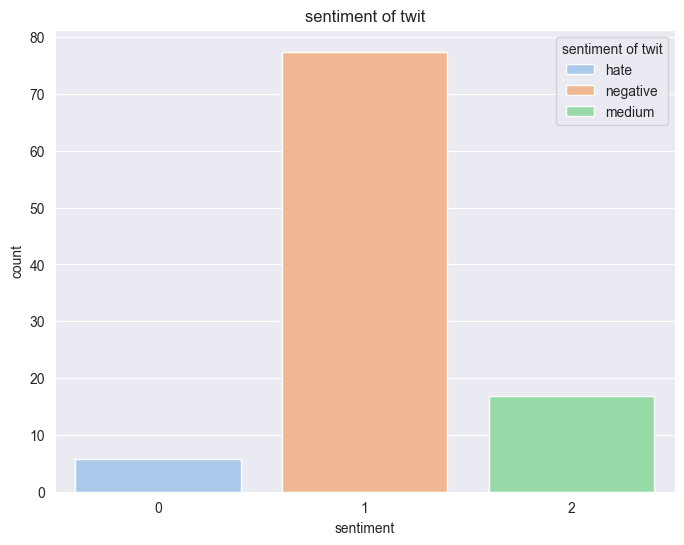

In [242]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_label, x='class', palette='pastel', stat='percent', hue='class')
plt.title('sentiment of twit')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.legend(title='sentiment of twit', labels=['hate', 'negative', 'medium'])
plt.show()

In [243]:
df_label = pd.read_csv(label_path)
df_label.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)
df_label.replace({"class":{0: 1}}, inplace=True)
df_label.replace({'class':{2: 0}}, inplace=True)
df_label.rename(columns ={'class':'label'}, inplace = True)
df_label.head(10)

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"""
6,1,"!!!!!!""@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"""
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;
8,1,""" &amp; you might not get ya bitch back &amp; thats that """
9,1,""" @rhythmixx_ :hobbies include: fighting Mariam""\n\nbitch"


In [244]:
frame=[df_train,df_label]
frame

[       label  \
 0          0   
 1          0   
 2          0   
 3          0   
 4          0   
 ...      ...   
 31957      0   
 31958      0   
 31959      0   
 31960      1   
 31961      0   
 
                                                                                      tweet  
 0                                       user father dysfunct selfish drag kid dysfunct run  
 1             useruser thanklyft credit use caus offer wheelchair van pdxdisapointgetthank  
 2                                                                           bihday majesti  
 3                                                              model love u take u time ur  
 4                                                                   factsguidsocieti motiv  
 ...                                                                                    ...  
 31957                                                                    ateuser isz youuu  
 31958  see nina turner airwav tri wrap ma

In [245]:
df_wide = pd.concat(frame, ignore_index=True)
df_wide.head(10)

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct run
1,0,useruser thanklyft credit use caus offer wheelchair van pdxdisapointgetthank
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguidsocieti motiv
5,0,huge fan fare big talk leavchao pay disput get allshowandnogo
6,0,user camp tomorrowuseruseruseruseruseruseruser danni
7,0,next school year year examthink schoolexamhateimaginactorslifrevolutionschoolgirl
8,0,love land allincavchampionclevelandclevelandcavali
9,0,useruser welcom gr


In [246]:
df_label.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [247]:
df_wide['tweet'] = df_wide['tweet'].apply(clean_text)
df_wide.head()

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunct run
1,0,userus thanklyft credit use caus offer wheelchair van pdxdisapointgetthank
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguidsocieti motiv


In [248]:
df_wide.tail()

,label,tweet
56740,1,muthaf lie lifeaskpearlcorey emanuel righttl trash minebibl scriptur hymn
56741,0,gone broke wrong heart babidrove redneck crazi
56742,1,young buck wanna eat dat nigguh like aint fuckin dis
56743,1,youu got wild bitch tellin lie
56744,0,ruffl ntac eileen dahlia beauti color combin pinkorangyellowampwhitecoll http co h dyebvnzb


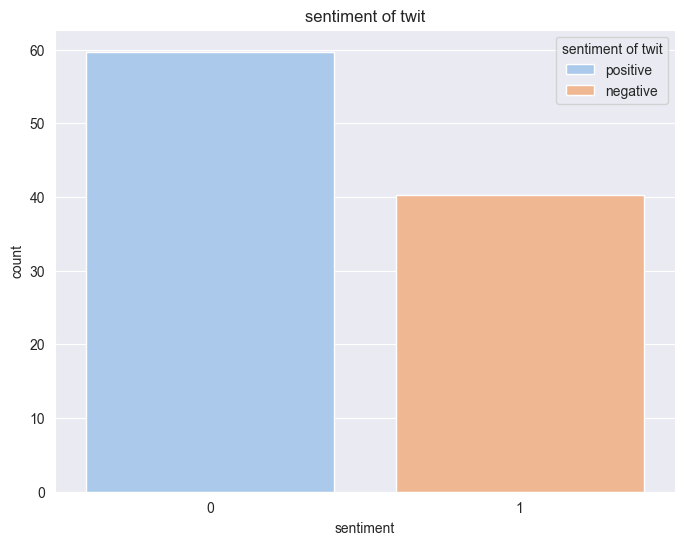

In [249]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wide, x='label', palette='pastel', stat='percent', hue='label')
plt.title('sentiment of twit')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.legend(title='sentiment of twit', labels=['positive', 'negative'])
plt.show()


In [250]:
df_wide.shape

(56745, 2)

In [251]:
df_train.shape

(31962, 2)

Повторим обучение на новом наборе данных

In [252]:
x_wide_train, x_wide_test, y_wide_train, y_wide_test = train_test_split(df_wide['tweet'], df_wide['label'], test_size=0.2, shuffle=True)

In [253]:
count = CountVectorizer(ngram_range=(1, 4))
x_wide_train_vectorizer = count.fit_transform(x_wide_train)
x_wide_test_vectorizer = count.transform(x_wide_test)

In [254]:
x_wide_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [255]:
x_wide_train_tfidf = tfidf_transformer.fit_transform(x_wide_train_vectorizer)
x_wide_train_tfidf.toarray()
x_wide_test_tfidf = tfidf_transformer.transform(x_wide_test_vectorizer)
x_wide_test_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [256]:
model_wide_vectorizer = MultinomialNB().fit(x_wide_train_vectorizer, y_wide_train)
prediction_wide_vectorizer = model_wide_vectorizer.predict(x_wide_test_vectorizer)
print(confusion_matrix(y_wide_test,prediction_wide_vectorizer))
print (classification_report(y_wide_test, prediction_wide_vectorizer))

[[6154  528]
 [ 574 4093]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6682
           1       0.89      0.88      0.88      4667

    accuracy                           0.90     11349
   macro avg       0.90      0.90      0.90     11349
weighted avg       0.90      0.90      0.90     11349



In [257]:
model_wide_tfidf= MultinomialNB().fit(x_wide_train_tfidf, y_wide_train)
prediction_wide_tfidf=model_wide_tfidf.predict(x_wide_test_tfidf)
print(confusion_matrix(y_wide_test,prediction_wide_tfidf))
print (classification_report(y_wide_test, prediction_wide_tfidf))

[[6429  253]
 [ 928 3739]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      6682
           1       0.94      0.80      0.86      4667

    accuracy                           0.90     11349
   macro avg       0.91      0.88      0.89     11349
weighted avg       0.90      0.90      0.89     11349



Мы получили значения сильно лучше, чем на первом наборе

Попробуем поучить другими методами, например Логистической регрессией и К ближайших соседов

In [258]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [259]:
clf.fit(x_train_vectorizer, y_train)
prediction_clf=clf.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_clf))
print (classification_report(y_test, prediction_clf))

[[5954   11]
 [ 299  129]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5965
           1       0.92      0.30      0.45       428

    accuracy                           0.95      6393
   macro avg       0.94      0.65      0.71      6393
weighted avg       0.95      0.95      0.94      6393



In [260]:
clf.fit(x_train_tfidf, y_train)
prediction_tfidf=clf.predict(x_test_tfidf)
print(confusion_matrix(y_test,prediction_tfidf))
print (classification_report(y_test, prediction_tfidf))

[[5953   12]
 [ 359   69]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5965
           1       0.85      0.16      0.27       428

    accuracy                           0.94      6393
   macro avg       0.90      0.58      0.62      6393
weighted avg       0.94      0.94      0.92      6393



In [261]:
clf.fit(x_wide_train_vectorizer, y_wide_train)
prediction_clf_wide_vectoriser=clf.predict(x_wide_test_vectorizer)
print(confusion_matrix(y_wide_test,prediction_clf_wide_vectoriser))
print (classification_report(y_wide_test, prediction_clf_wide_vectoriser))

[[6514  168]
 [ 945 3722]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6682
           1       0.96      0.80      0.87      4667

    accuracy                           0.90     11349
   macro avg       0.92      0.89      0.90     11349
weighted avg       0.91      0.90      0.90     11349



In [262]:
clf.fit(x_wide_train_tfidf, y_wide_train)
prediction_clf_wide_tfidf=clf.predict(x_wide_test_tfidf)
print(confusion_matrix(y_wide_test,prediction_clf_wide_tfidf))
print (classification_report(y_wide_test, prediction_clf_wide_tfidf))

[[6256  426]
 [ 811 3856]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6682
           1       0.90      0.83      0.86      4667

    accuracy                           0.89     11349
   macro avg       0.89      0.88      0.89     11349
weighted avg       0.89      0.89      0.89     11349



К ближайших соседов

In [263]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

In [264]:
neigh.fit(x_train_vectorizer, y_train)
prediction_neigh=neigh.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_neigh))
print (classification_report(y_test, prediction_neigh))

[[5965    0]
 [ 390   38]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5965
           1       1.00      0.09      0.16       428

    accuracy                           0.94      6393
   macro avg       0.97      0.54      0.57      6393
weighted avg       0.94      0.94      0.91      6393



In [265]:
neigh.fit(x_train_tfidf, y_train)
prediction_tfidf=neigh.predict(x_test_tfidf)
print(confusion_matrix(y_test,prediction_tfidf))
print (classification_report(y_test, prediction_tfidf))

[[5965    0]
 [ 393   35]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5965
           1       1.00      0.08      0.15       428

    accuracy                           0.94      6393
   macro avg       0.97      0.54      0.56      6393
weighted avg       0.94      0.94      0.91      6393



In [266]:
neigh.fit(x_wide_train_vectorizer, y_wide_train)
prediction_neigh_wide_vectorizer=neigh.predict(x_wide_test_vectorizer)
print(confusion_matrix(y_wide_test,prediction_neigh_wide_vectorizer))
print (classification_report(y_wide_test, prediction_neigh_wide_vectorizer))

[[6655   27]
 [2151 2516]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6682
           1       0.99      0.54      0.70      4667

    accuracy                           0.81     11349
   macro avg       0.87      0.77      0.78     11349
weighted avg       0.85      0.81      0.79     11349



In [267]:
neigh.fit(x_wide_train_tfidf, y_wide_train)
prediction_neigh_wide_tfidf=neigh.predict(x_wide_test_tfidf)
print(confusion_matrix(y_wide_test,prediction_neigh_wide_tfidf))
print (classification_report(y_wide_test, prediction_neigh_wide_tfidf))

[[6678    4]
 [4525  142]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      6682
           1       0.97      0.03      0.06      4667

    accuracy                           0.60     11349
   macro avg       0.78      0.51      0.40     11349
weighted avg       0.75      0.60      0.46     11349



Использование различных методов не позволяет получить хороших результатов на несбалансированных данных, в отличие от данных с более полным распределением. 
Для этого попробуем использовать методы по ребалансу данных. 

Существуют два подхода к ребалансу. 
1. Oversampling
2. Undersampling

В первом случае мы используем метод случайного наполнения класса меньшинства для достижения ожидаемой пропорции. Например, алгоритм SMOTE. В его основе лежит алгоритм К-ближайших соседей, с помощью которого происходит синтетическое наполнение младшего класса

Во втором случае, применяется случайное разреживание старшего класса. Например, TomekLinks, который чистит старший класс путём удаления из него взаимно близко расположенных объектов старшего класса и младшего

In [268]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
x_train_smote, y_train_smote = smote_tomek.fit_resample(x_train_vectorizer, y_train)

Для примера используем логистическую регрессию, показавшую худший результат на первичных данных

In [269]:
clf_smote = LogisticRegression(class_weight = 'balanced')
clf_smote.fit(x_train_smote, y_train_smote)
predictions = clf_smote.predict(x_test_vectorizer)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      5965
           1       0.17      0.60      0.26       428

    accuracy                           0.78      6393
   macro avg       0.57      0.69      0.57      6393
weighted avg       0.91      0.78      0.83      6393



In [270]:
from imblearn.under_sampling import TomekLinks

augm = TomekLinks(sampling_strategy='majority')
x_train_augm, y_train_augm = augm.fit_resample(x_train_vectorizer, y_train)

In [271]:
clf_augm = LogisticRegression(class_weight = 'balanced')
clf_augm.fit(x_train_augm, y_train_augm)
predictions = clf_augm.predict(x_test_vectorizer)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5965
           1       0.78      0.43      0.55       428

    accuracy                           0.95      6393
   macro avg       0.87      0.71      0.76      6393
weighted avg       0.95      0.95      0.95      6393



Вывод. 
методы работы с несбалансированными данными могут показать значительное улучшение качества работы с моделями